In [1]:
import os
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
os.chdir("D:\\DataScience\\Insurance")
os.listdir()

['Insurance.csv']

In [3]:
rdata=pd.read_csv("Insurance.csv")
rdata.head()

,months_as_customer,age,policy_number,policy_bind_date,incident_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,X_c39
0,328,48,521585,10/17/2014,1/25/2015,OH,250/500,1000,1406.91,0,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,6/27/2006,1/21/2015,IN,250/500,2000,1197.22,5000000,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,09-06-2004,2/22/2015,OH,100/300,2000,1413.14,5000000,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,5/25/1994,01-10-2015,IL,250/500,2000,1415.74,6000000,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,2/17/2015,IL,500/1000,1000,1583.91,6000000,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
rdata.describe()
rdata.keys()
rdata.shape

(1000, 40)

In [5]:
rdata.isnull().sum()


months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
incident_date                     0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
#(rdata==0).sum()
rdata=rdata.drop(["X_c39"],1)

In [7]:
corr=rdata.corr()


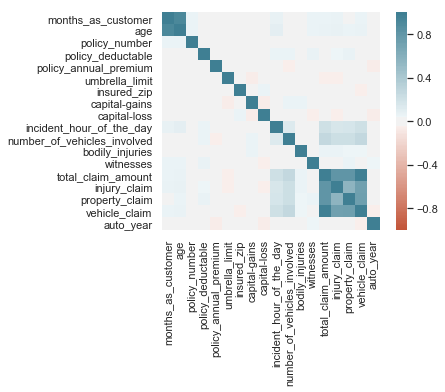

In [12]:
ax = sns.heatmap(
    corr,vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)


In [44]:
rdata=rdata.replace('?', np.NaN)
rdata.head()

,months_as_customer,age,policy_number,policy_bind_date,incident_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,1/25/2015,OH,250/500,1000,1406.91,0,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,1/21/2015,IN,250/500,2000,1197.22,5000000,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,09-06-2004,2/22/2015,OH,100/300,2000,1413.14,5000000,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1994,01-10-2015,IL,250/500,2000,1415.74,6000000,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,2/17/2015,IL,500/1000,1000,1583.91,6000000,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [45]:
rdata.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
incident_date                    0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [49]:
cdata=rdata.copy()

In [50]:
cdata=cdata.fillna(method="pad")

In [53]:
#cdata.isnull().sum()
cdata.head(10)

,months_as_customer,age,policy_number,policy_bind_date,incident_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,1/25/2015,OH,250/500,1000,1406.91,0,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,1/21/2015,IN,250/500,2000,1197.22,5000000,...,0,YES,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,09-06-2004,2/22/2015,OH,100/300,2000,1413.14,5000000,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1994,01-10-2015,IL,250/500,2000,1415.74,6000000,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,2/17/2015,IL,500/1000,1000,1583.91,6000000,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,10-12-2006,01-02-2015,OH,250/500,1000,1351.10,0,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,06-04-2005,1/13/2015,IN,250/500,1000,1333.35,0,...,0,NO,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,02-03-2002,2/27/2015,IL,100/300,1000,1137.03,0,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,02-05-2013,1/30/2015,IL,100/300,500,1442.99,0,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,7/25/2011,01-05-2015,IL,100/300,500,1315.68,0,...,1,YES,42300,4700,4700,32900,Saab,92x,1996,N


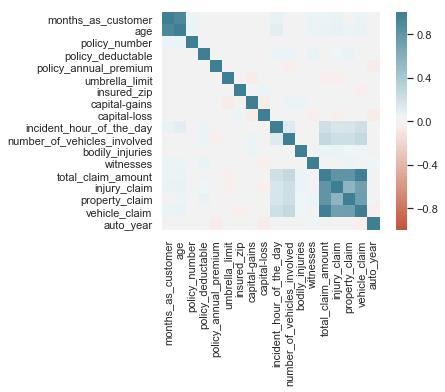

In [55]:
policy_state
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
incident_type
collision_type
incident_severity
authorities_contacted
incident_state
incident_city
incident_location
property_damaged
police_report_available
auto_make
auto_model
fraud_reported


In [59]:
mdata=cdata.copy()
#mdata=With Date Columns


,months_as_customer,age,policy_number,policy_bind_date,incident_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,1/25/2015,OH,250/500,1000,1406.91,0,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,1/21/2015,IN,250/500,2000,1197.22,5000000,...,0,YES,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,09-06-2004,2/22/2015,OH,100/300,2000,1413.14,5000000,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1994,01-10-2015,IL,250/500,2000,1415.74,6000000,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,2/17/2015,IL,500/1000,1000,1583.91,6000000,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [60]:
cdata=cdata.drop(["policy_bind_date","incident_date","policy_csl"],1)

In [90]:
cdata=cdata.drop(['incident_location','auto_model','auto_make'],1)

In [64]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le=LabelEncoder()

In [75]:
cdata["policy_state"].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [91]:
cdata.keys()

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year',
       'fraud_reported'],
      dtype='object')

In [96]:
cdata["policy_state"] = le.fit_transform(cdata["policy_state"])
cdata['insured_sex'] = le.fit_transform(cdata['insured_sex'])
cdata['insured_education_level'] = le.fit_transform(cdata['insured_education_level'])
cdata['insured_occupation'] = le.fit_transform(cdata['insured_occupation'])
cdata['insured_hobbies'] = le.fit_transform(cdata['insured_hobbies'])
cdata['insured_relationship'] = le.fit_transform(cdata['insured_relationship'])
cdata['incident_type'] = le.fit_transform(cdata['incident_type'])
cdata['collision_type'] = le.fit_transform(cdata['collision_type'])
cdata['incident_severity'] = le.fit_transform(cdata['incident_severity'])
cdata['authorities_contacted'] = le.fit_transform(cdata['authorities_contacted'])
cdata['incident_state'] = le.fit_transform(cdata['incident_state'])
cdata['incident_city'] = le.fit_transform(cdata['incident_city'])
cdata['property_damage'] = le.fit_transform(cdata['property_damage'])
cdata['police_report_available'] = le.fit_transform(cdata['police_report_available'])
cdata['fraud_reported'] = le.fit_transform(cdata['fraud_reported'])


In [97]:
cdata.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,521585,2,1000,1406.91,0,466132,1,4,...,1,1,2,1,71610,6510,13020,52080,2004,1
1,228,42,342868,1,2000,1197.22,5000000,468176,1,4,...,1,0,0,1,5070,780,780,3510,2007,1
2,134,29,687698,2,2000,1413.14,5000000,430632,0,6,...,0,2,3,0,34650,7700,3850,23100,2007,0
3,256,41,227811,0,2000,1415.74,6000000,608117,0,6,...,0,1,2,0,63400,6340,6340,50720,2014,1
4,228,44,367455,0,1000,1583.91,6000000,610706,1,0,...,0,0,1,0,6500,1300,650,4550,2009,0


In [99]:
data=cdata.copy()

In [106]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [110]:
from sklearn.model_selection import train_test_split

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=52)

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
cls=RandomForestClassifier(n_estimators=200)

In [149]:
model=cls.fit(x_train,y_train)

C:\Users\deep.bham\AppData\Local\conda\conda\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [150]:
y_pred=model.predict(x_test)

In [151]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracy_score(y_pred,y_test)

0.81

In [152]:
#Cross validation
from sklearn.model_selection import cross_val_score

In [158]:
accuracy = cross_val_score(cls, y_test, y_pred, scoring='accuracy', cv = 10)
accuracy

array([0.83870968, 0.86666667, 0.76666667, 0.83333333, 0.83333333,
       0.7       , 0.76666667, 0.8       , 0.8       , 0.82758621])

In [156]:
accuracy = cross_val_score(cls, y_test, y_pred, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of Random Forests is: " , accuracy)
 



Accuracy of Random Forests is:  81.01928068223954


In [162]:
#Normalization

from sklearn.preprocessing import scale
fdata=data.copy()

In [164]:
fdata=scale(data)

In [166]:
fdata

array([[ 1.07828959,  0.99083647, -0.09595307, ...,  0.74965272,
        -0.1834404 ,  1.74601919],
       [ 0.2088765 ,  0.33407345, -0.79152739, ..., -1.82334593,
         0.31549088,  1.74601919],
       [-0.60837181, -1.08891308,  0.55056594, ..., -0.78556451,
         0.31549088, -0.57273139],
       ...,
       [-0.64314834, -0.54161057,  1.44891961, ...,  0.77190224,
        -1.5139238 , -0.57273139],
       [ 2.20852662,  2.52328351, -0.04786687, ..., -0.07357971,
        -1.18130295, -0.57273139],
       [ 2.19113835,  2.3043625 ,  0.03830297, ..., -1.81434017,
         0.31549088, -0.57273139]])

In [168]:
fx=data.iloc[:,:-1]
fy=data.iloc[:,-1:]
fx_train,fx_test,fy_train,fy_test=train_test_split(fx,fy,test_size=0.30,random_state=52)
f_cls=RandomForestClassifier(n_estimators=200)
f_model=cls.fit(fx_train,fy_train)
fy_pred=f_model.predict(fx_test)

C:\Users\deep.bham\AppData\Local\conda\conda\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [170]:
accuracy = cross_val_score(cls, fy_test, fy_pred, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of Random Forests is: " , accuracy)
 


Accuracy of Random Forests is:  83.00704486466446
